#### selenium 패키지 모듈 이용한 자동 크롤링
- webdriver라는 API를 통해 운영체제에 설치된 웹 브라우저를 제어하는 함수를 포함한 패키지
- 써드파티라이브러리이기 때문에 설치 해 줘야 함
- prompt 에서 설치
    - pip install selenium

In [ ]:
# 노트북에서 패키지 설치
# !pip install selenium

In [14]:
# 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

- selenium은 브라우저를 컨트롤하는 기능이기 때문에 webdriver 프로그램을 사용
    - webdriver는 브라우저 종류에 따라 브라우저 제작 업체에서 제공
    
### 크롬드라이버 다운로드
- https://chromedriver.chromium.org/downloads

### 크롬 버전 확인
- 메뉴 - 도움말 - 크롬정보

**공식site : https://www.selenium.dev/documentation/webdriver/getting_started/upgrade_to_selenium_4/**
### 관련 메서드
- get(url) : url에 접근하는 메서드
- 셀레니움 버전 up으로 인해 문법변경

- from selenium.webdriver.common.by import By
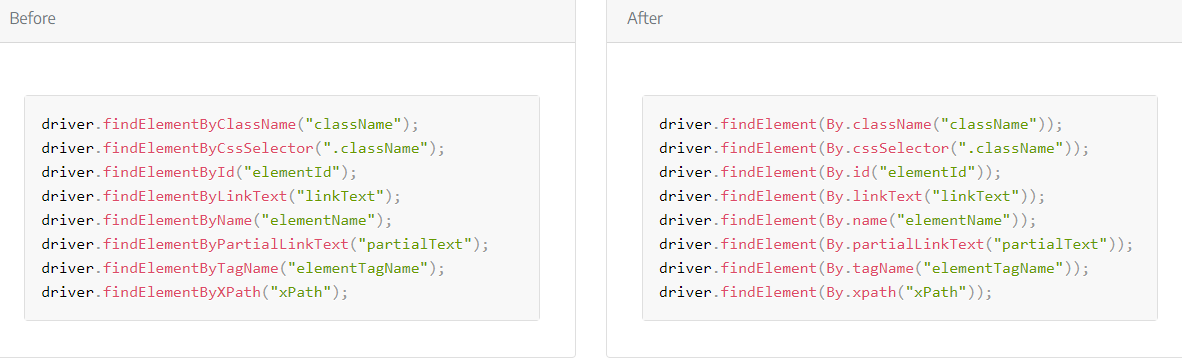 <br>

- findElement() : 코드에서 조건에 맞는 태그 중 처음 만나는 태그(find)
- findElements() : 코드에서 조건에 맞는 모든 태그(findAll)

### 단,  By를 제외한 나머지 속성명은 모두 대문자로 사용<br>
    - ex)By.TAGNAME <br>


- Webdriver 객체 생성
    * driver = webdriver.Chrome(드라이버경로)

- 접근한 페이지 source 추출
    * html=diver.page_source

In [15]:
# 1. webdriver 객체 생성
driver=webdriver.Chrome('./driver/chromedriver')

C:\Users\JungHun.DESKTOP-JRGUSS9\AppData\Local\Temp\ipykernel_3928\1287460249.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./driver/chromedriver')


In [16]:
# 페이지 접근
url='https://nid.naver.com/nidlogin.login'
driver.get(url)
url

'https://nid.naver.com/nidlogin.login'

In [ ]:
# driver를 통해 화면 캡쳐
driver.save_screenshot('crawl_data/sshot.png')

### 동적 로그인 진행

In [18]:
# id 값 전달
# id 입력하는 input box 찾기
id_elem=driver.find_element(By.ID,'id')
type(id_elem)

selenium.webdriver.remote.webelement.WebElement

In [19]:
# id 입력 input box 기존 값 지우기
id_elem.clear()
# id 값 전달
id_elem.send_keys('duddlswnddb') # webelement 객체인 id_elem으로 데이터전송

In [24]:
# 비밀번호 입력  input box 찾기
pw_elem=driver.find_element(By.ID,'pw')
pw_elem.clear()
pw_elem.send_keys('dlgovl2001!')

In [26]:
# 로그인 버튼 클릭
xpath='//*[@id="log.login"]'
# 로그인버튼에서 검사 - copy - xpath - //*[@id="log.login"]
#로그인 버튼을 찾아서 클릭
driver.find_element(By.XPATH,xpath).click()

# 자동입력 방지 문자가 나타남
# send_keys() 함수 사용 - 봇으로 인식

In [27]:
# 자동입력 방지 문자 우회하기위해 브라우저 종료 후 다시 접속
driver = webdriver.Chrome('./driver/chromedriver')
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)

C:\Users\JungHun.DESKTOP-JRGUSS9\AppData\Local\Temp\ipykernel_3928\3767184447.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [43]:
# 자동입력 방지 문자 우회
# script 코드 작성
# 본인 아이디
id_input='duddlswnddb'
# 본인 패스워드
pw_input='dlgovl2001!'
# script 코드
# 로그인 페이지 - document
# getElementByName(id)
"document.getElementsByName('id')[0].value=\'"+id_input+"\'"
"document.getElementsByName('id')[0].value=\'"+pw_input+"\'"


"document.getElementsByName('id')[0].value='dlgovl2001!'"

In [44]:
# 자동입력 방지 문자 우회하기위해 브라우저 종료 후 다시 접속
driver = webdriver.Chrome('./driver/chromedriver')
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)

C:\Users\JungHun.DESKTOP-JRGUSS9\AppData\Local\Temp\ipykernel_3928\3767184447.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


### webdriver 통해 script 코드 직접 실행
- driver.execute_script() 함수 - driver로 script 코드를 직접 실행

In [45]:
driver.execute_script("document.getElementsByName('id')[0].value=\'"+id_input+"\'")

In [46]:
driver.execute_script("document.getElementsByName('pw')[0].value=\'"+pw_input+"\'")

In [47]:
# 버튼 클릭
# 로그인 버튼 클릭
xpath='//*[@id="log.login"]'

## 로그인 버튼 클릭
#로그인 버튼을 찾아서 클릭
driver.find_element(By.XPATH, xpath).click() # 셀레니움 클릭함수



In [48]:
# 버튼클릭
# 등록버튼 클릭
rpath='//*[@id="new.save"]'
driver.find_element(By.XPATH, rpath).click() # 셀레니움 클릭함수


In [49]:
# 메일 페이지로 접근
driver.get('http://mail.naver.com')

'<html lang="ko"><head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.220427.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.220427.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net">\n\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com">\n\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com">\n\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com">\n\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net">\n\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.220427.css">\n\t\t\n\t\n\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\n\t\n\t\t\n\t\n\t<title>받은메일함(24958) : 네이버 메일</title>\n\t<script type="text/javascript">\n\t\t\n\t\t\n\t\t\n\t\tvar gnb_service = "ma
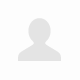
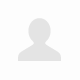
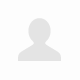
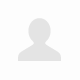

In [50]:
# 코드 추출
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
html

<html lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/css/mail2_le.min.220427.css" rel="stylesheet" type="text/css"/>
<link href="/css/mail_skin.min.220427.css" rel="stylesheet" type="text/css"/>
<link href="//ssl.pstatic.net" rel="dns-prefetch"/>
<link href="//lcs.naver.com" rel="dns-prefetch"/>
<link href="//cc.naver.com" rel="dns-prefetch"/>
<link href="//static.nid.naver.com" rel="dns-prefetch"/>
<link href="//phinf.pstatic.net" rel="dns-prefetch"/>
<link href="/css/mail_me.min.220427.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?2" rel="shortcut icon"/>
<title>받은메일함(24958) : 네이버 메일</title>
<script type="text/javascript">
		
		
		
		var gnb_service = "mail";
		var gnb_logout = "http://www.naver.com";
		var gnb_template = "gnb_utf8";
		var gnb_brightness = 3;
		var gnb_item_hide_option = 8;
		var gnb_one_naver = 1;
		
		
	</script>
<style type="text/css">
			.
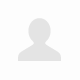
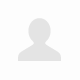
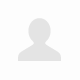
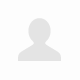

In [51]:
soup

In [52]:
# 드라이버 연결 끊기
driver.close()